In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
DATA_DIR = "../input/kaggle-survey-2022/"

In [3]:
os.listdir(DATA_DIR)

['Supplementary Data', 'kaggle_survey_2022_responses.csv']

In [4]:
data_df = pd.read_csv(DATA_DIR+'kaggle_survey_2022_responses.csv')
data_df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning:

Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.



,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


1. Countries representing most DL/Ml developers
2. Most representative age group
3. how many students vs professionals
4. How students prefer to learn DS and ML
5. How professionals prefer to learn DS and ML
6. Programming language students prefer
7. programming language that professionals prefer
8. frameworks that students prefer vs professionals
9. What idustry is utilizing ML most, how they use ML , Q 24, 27, 28
10. Which countries have most DS and ML professionals and students


# Top 10 Countries representing most DL/Ml developers

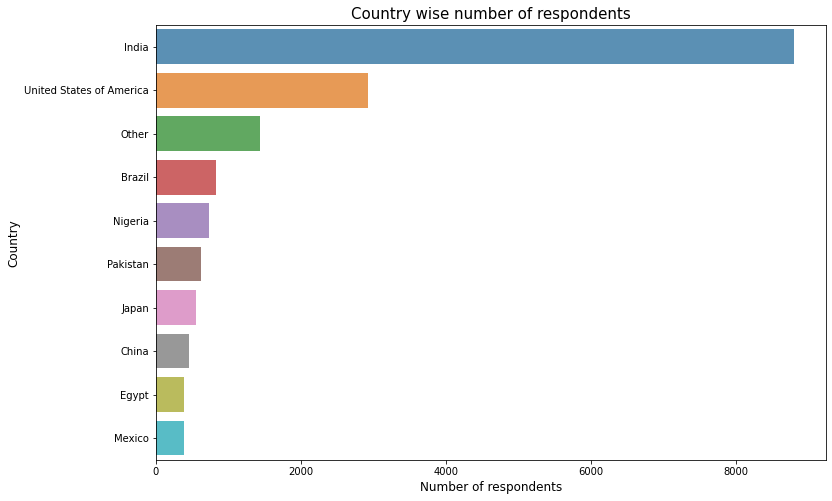

In [5]:
#ax = data_df.loc[1:, 'Q4'].value_counts().plot(kind="bar", figsize=(10, 5))
d = pd.DataFrame(data_df.loc[1:, 'Q4'].value_counts().nlargest(10))
plt.figure(figsize=(12,8))
sns.barplot(x=d['Q4'], y=d.index, alpha=0.8)
plt.xlabel('Number of respondents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title("Country wise number of respondents", fontsize=15)
plt.show()

# Most representative age group

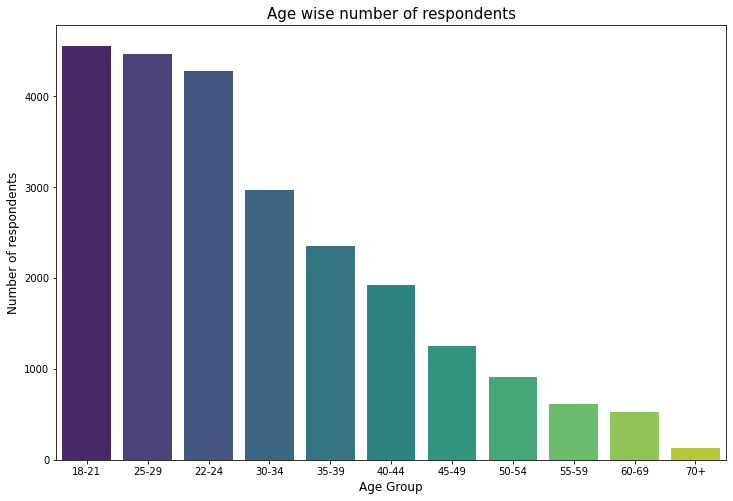

In [6]:
age_group = pd.DataFrame(data_df.loc[1:, 'Q2'].value_counts())
plt.figure(figsize=(12,8))
sns.barplot(x=age_group.index, y=age_group['Q2'], palette='viridis')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of respondents', fontsize=12)
plt.title("Age wise number of respondents", fontsize=15)
plt.show()

# How many students vs professionals

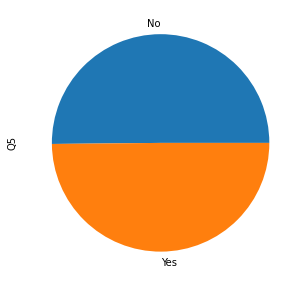

In [7]:
ax3 = data_df.loc[1:, 'Q5'].value_counts().plot(kind="pie", figsize=(10, 5))

# How students prefer to learn DS and ML

In [8]:
ml_prefer = data_df.loc[:,'Q5':'Q6_12'] 
ml_prefer.head()

,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12
0,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...
1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,University Courses (resulting in a university ...,NaN,NaN
3,Yes,Coursera,edX,NaN,DataCamp,NaN,Udacity,Udemy,LinkedIn Learning,NaN,University Courses (resulting in a university ...,NaN,NaN
4,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,Other


In [9]:
students = ml_prefer.loc[(ml_prefer['Q5'] == 'Yes'),'Q6_1':].apply(pd.value_counts).fillna(0).astype(int)
students = students.sum(axis=1)

pros = ml_prefer.loc[(ml_prefer['Q5'] == 'No'),'Q6_1':].apply(pd.value_counts).fillna(0).astype(int)
pros = pros.sum(axis=1)

Text(0.5, 1.0, 'Popular learning platforms for professionals')

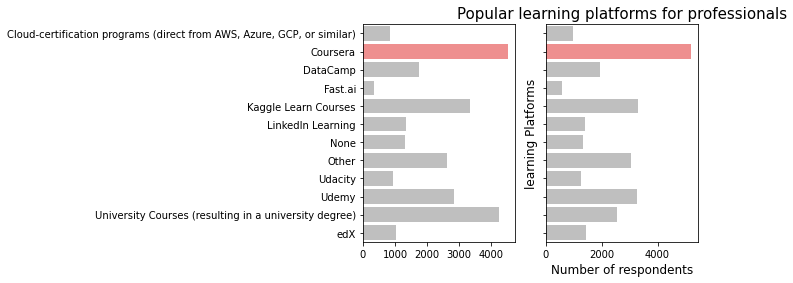

In [10]:
fig, axes = plt.subplots(1, 2, sharey=True)
sns.barplot(x=students.values, y=students.index, palette=['grey' if (x < max(students.values)) else 'red' for x in students.values ], alpha=0.5, ax=axes[0])
plt.xlabel('Number of respondents', fontsize=12)
plt.ylabel('learning Platforms', fontsize=12)
plt.title("Popular learning platforms for students", fontsize=15)

sns.barplot(x=pros.values, y=pros.index, palette=['grey' if (x < max(pros.values)) else 'red' for x in pros.values], alpha=0.5, ax=axes[1])
plt.xlabel('Number of respondents', fontsize=12)
#plt.ylabel('learning Platforms', fontsize=12)
plt.title("Popular learning platforms for professionals", fontsize=15)